In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
# Seaborn是一個基於matplotlib的Python圖形可視化庫。 在Matplotlib 的基礎上，進行了更高級的處理
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/tweets.csv'
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(file_path, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1251638,4,1996540107,Mon Jun 01 15:15:24 PDT 2009,NO_QUERY,Monarchdancer,"@liddesigns I shouldn't complain, next week I'..."
1547483,4,2182735887,Mon Jun 15 13:34:01 PDT 2009,NO_QUERY,shanajaca,@DileShakespeare I am counting on that LMAO XX
83037,0,1753235668,Sun May 10 00:41:38 PDT 2009,NO_QUERY,jjshan,OK so it 2:37am on mother's day and i am on se...
491803,0,2183957697,Mon Jun 15 15:13:06 PDT 2009,NO_QUERY,gilmoremkt,Furniture seller Plunkett going out of busines...
74937,0,1694989526,Mon May 04 04:50:45 PDT 2009,NO_QUERY,MissDibbs,@EETWiz hmmm...me too ....Three days is a lo...


In [5]:
df = df.drop(['ids', 'date', 'flag', 'user'], axis=1)

In [7]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}

def label_decoder(label):
  return lab_to_sentiment[label]

df.sentiment = df.target.apply(lambda x: label_decoder(x))
df.head()

<ipython-input-7-3c0d556d9ee7>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sentiment = df.target.apply(lambda x: label_decoder(x))


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [11]:
df.text = df.text.apply(lambda x: preprocess(x))

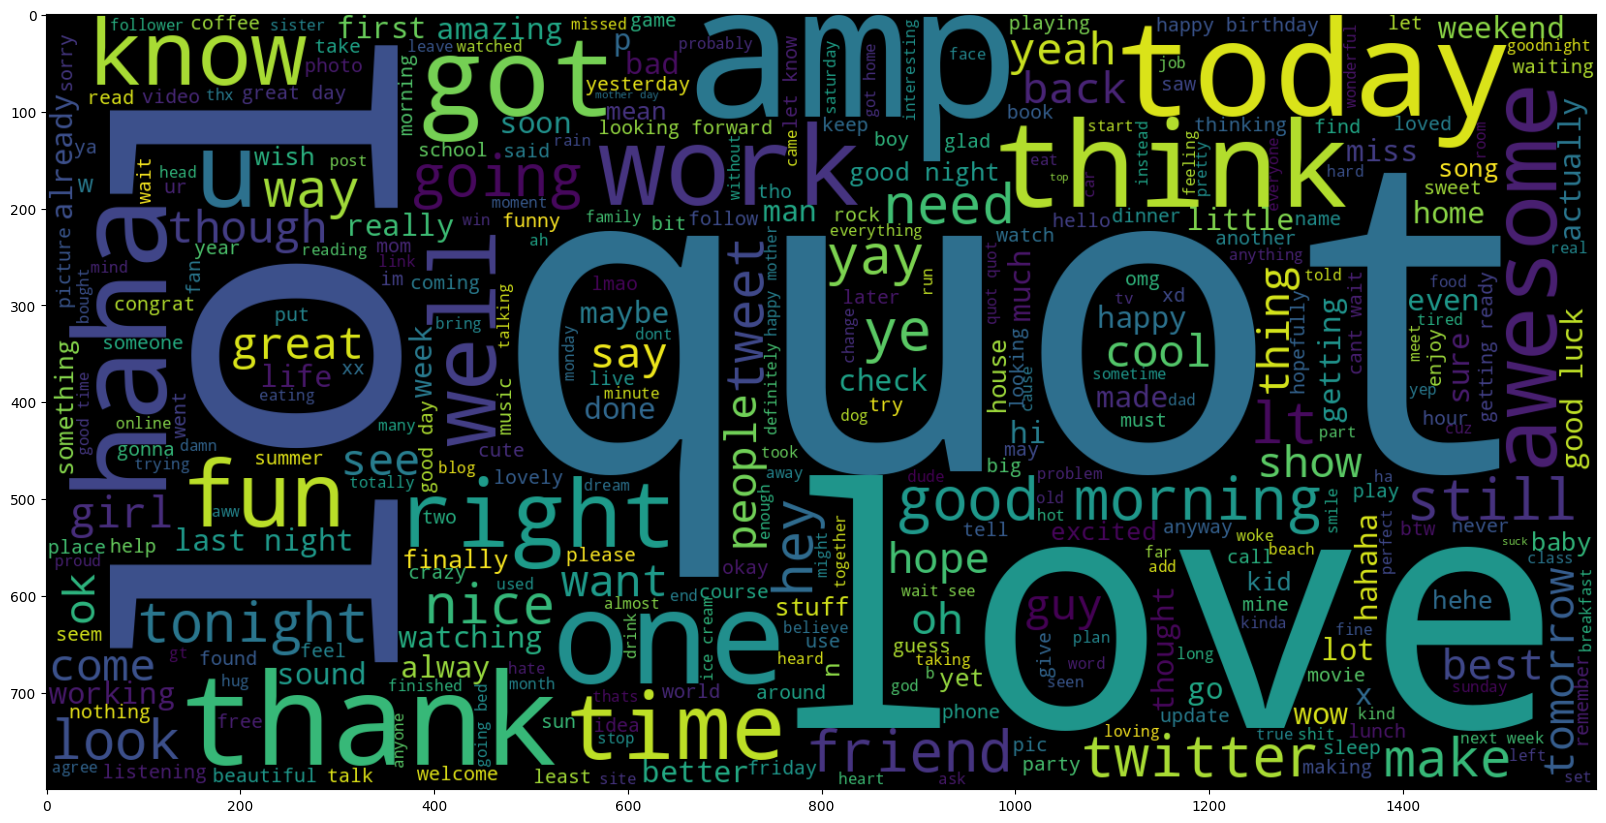

In [15]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 350 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

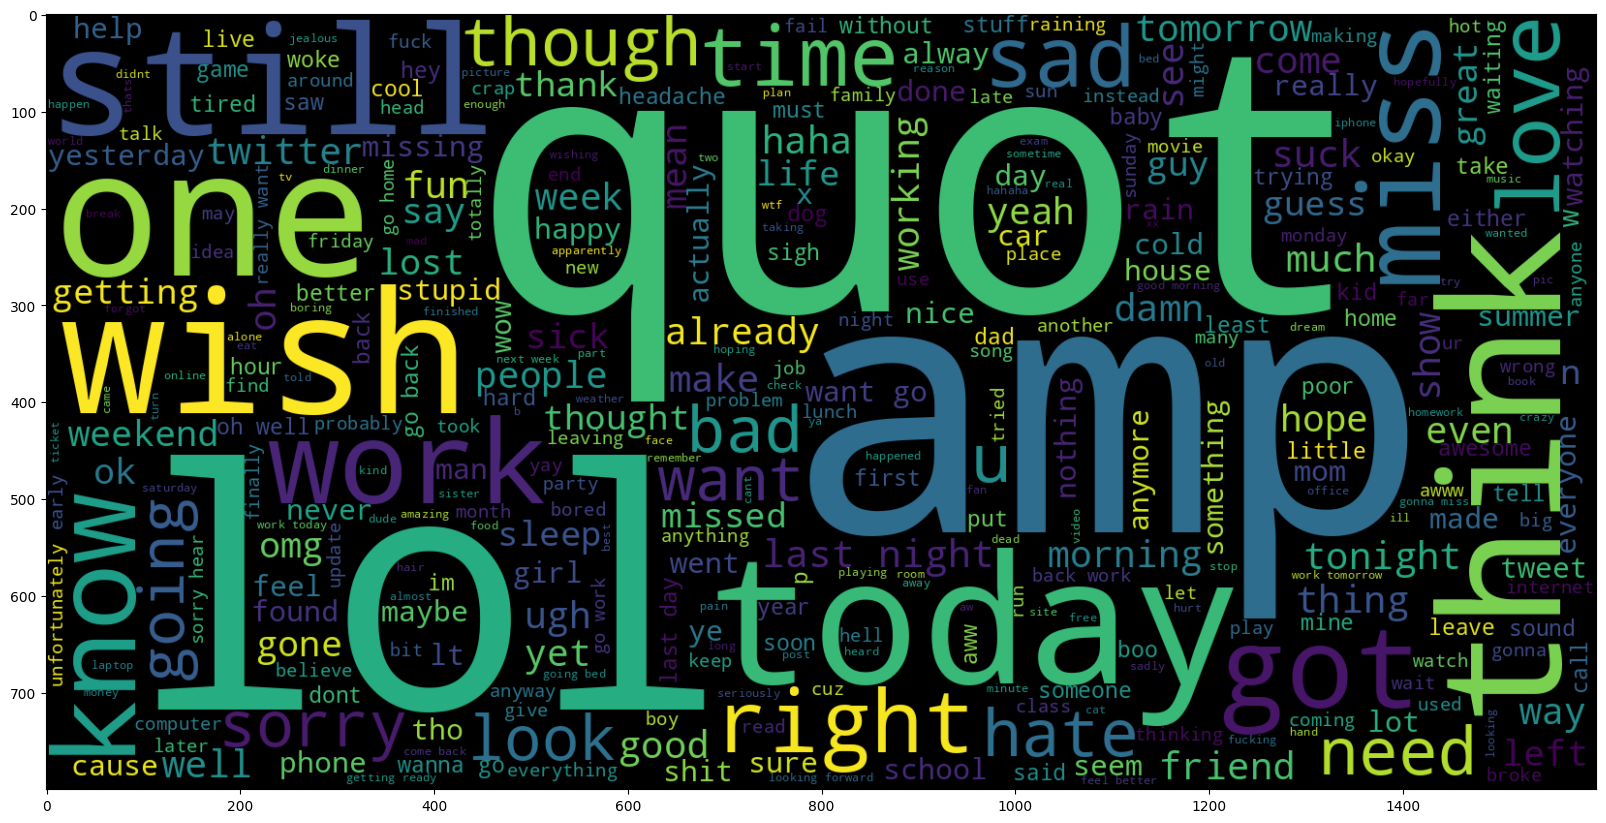

In [16]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 350 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')